In [128]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_csv("titanic/train.csv")

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


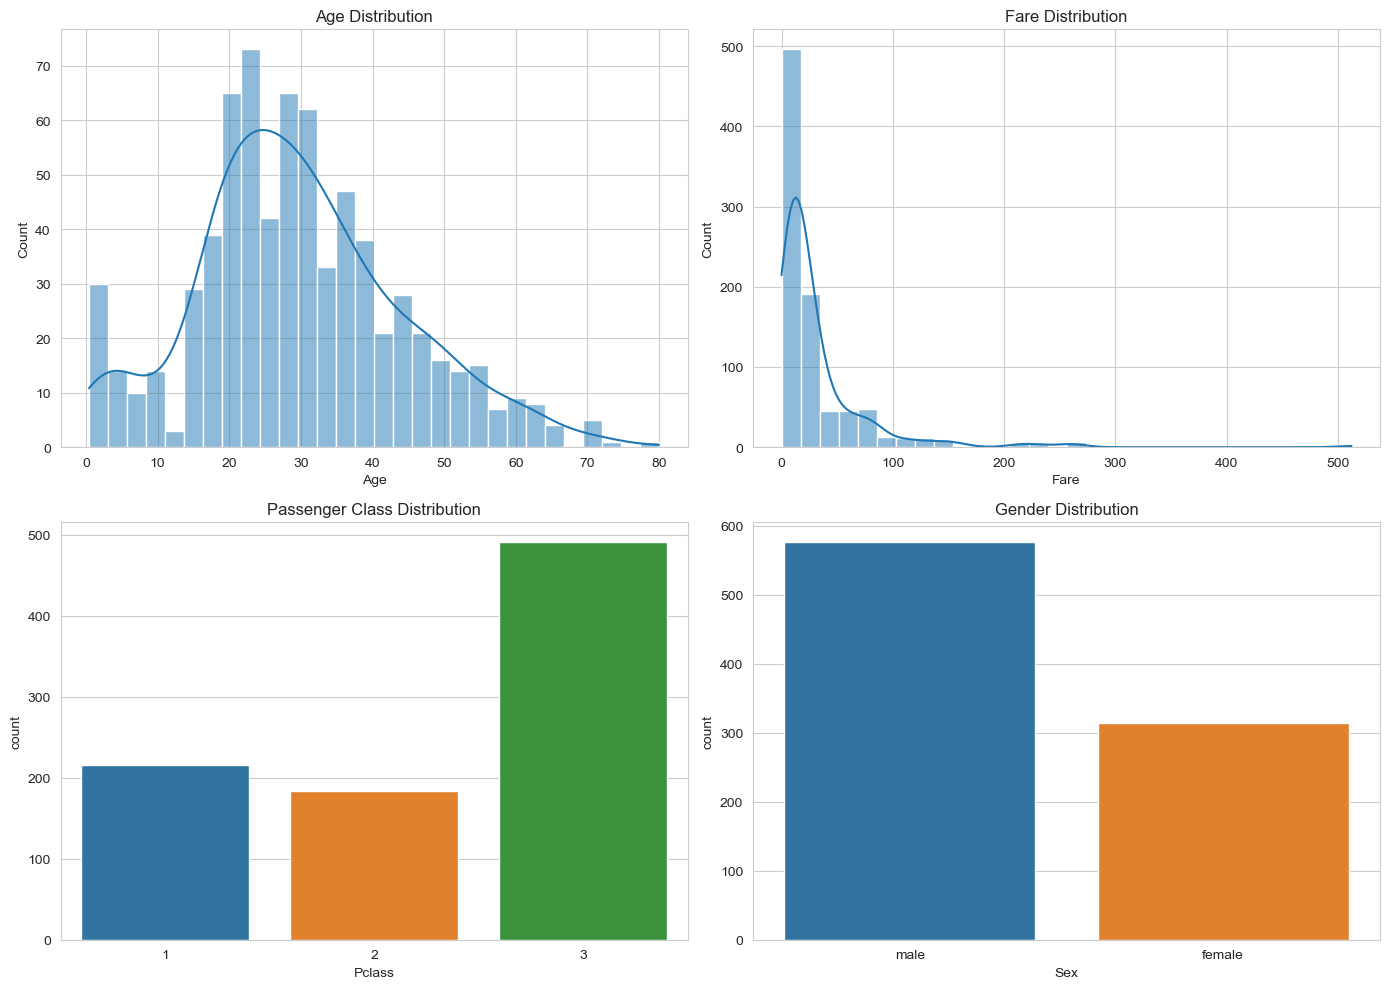

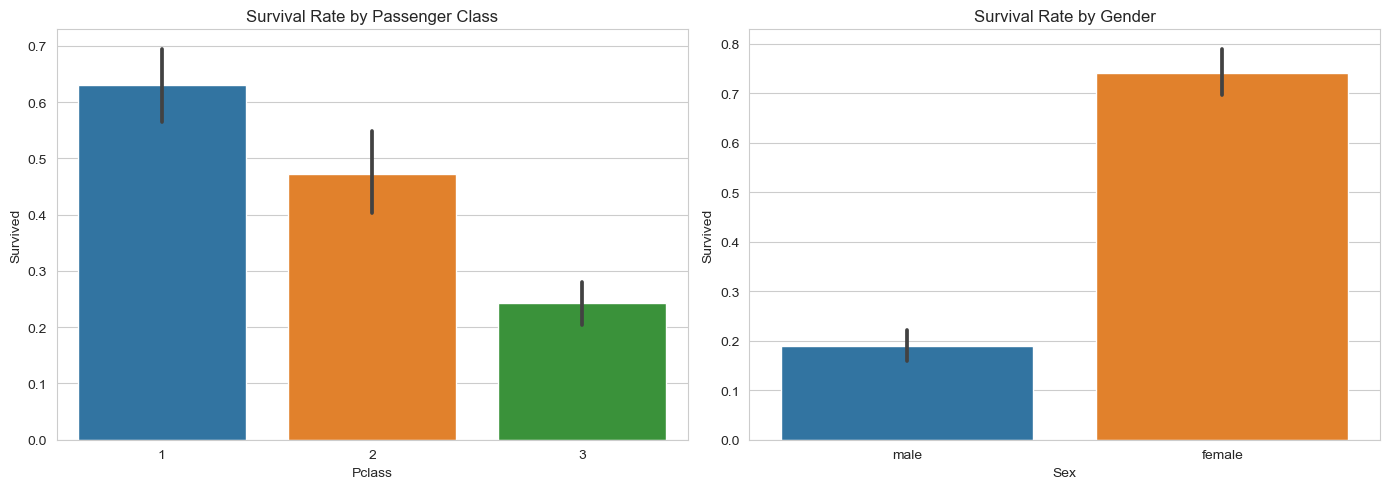

In [155]:

# Function to visualize the distribution of key variables
def visualize_distributions(df):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    sns.histplot(df['Age'].dropna(), bins=30, ax=axs[0, 0], kde=True)
    axs[0, 0].set_title('Age Distribution')
    sns.histplot(df['Fare'], bins=30, ax=axs[0, 1], kde=True)
    axs[0, 1].set_title('Fare Distribution')
    sns.countplot(x='Pclass', data=df, ax=axs[1, 0])
    axs[1, 0].set_title('Passenger Class Distribution')
    sns.countplot(x='Sex', data=df, ax=axs[1, 1])
    axs[1, 1].set_title('Gender Distribution')
    plt.tight_layout()
    plt.show()

# Function to visualize the correlation between survival and other variables
def visualize_survival_correlation(df):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.barplot(x='Pclass', y='Survived', data=df, ax=axs[0])
    axs[0].set_title('Survival Rate by Passenger Class')
    sns.barplot(x='Sex', y='Survived', data=df, ax=axs[1])
    axs[1].set_title('Survival Rate by Gender')
    plt.tight_layout()
    plt.show()

# Executing the visualization functions
visualize_distributions(df)
visualize_survival_correlation(df)


In [182]:
# Dropping rows where 'Pclass', 'Sex', or 'Survived' columns have NaN values, replacing missing age values with median values
df.dropna(subset=['Pclass', 'Sex'], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [150]:
# Encoding the 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [183]:
#Checking the percentage of passengers who survived
df['Survived'].mean() 

0.3838383838383838

Features selected based on visualizations, analytics and missing values

In [181]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


accuracy

0.8044692737430168

In [157]:
test_df = pd.read_csv("titanic/test.csv")

In [158]:
# Encoding the 'Sex' column
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})


In [168]:
# Dropping rows where 'Pclass', 'Sex', or 'Survived' columns have NaN values
test_df.dropna(subset=['Pclass', 'Sex','Fare'], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [172]:
X_test = test_df[['Pclass', 'Sex', 'Age','Fare']]



In [170]:
X_test

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875
...,...,...,...,...
409,3,1,3.0,13.7750
411,1,1,37.0,90.0000
412,3,1,28.0,7.7750
414,1,1,39.0,108.9000


In [173]:
y_predicted = model.predict(X_test)

In [174]:
model.predict_proba(X_test)

array([[0.91268037, 0.08731963],
       [0.54902721, 0.45097279],
       [0.88496474, 0.11503526],
       [0.89632823, 0.10367177],
       [0.39205738, 0.60794262],
       [0.8616721 , 0.1383279 ],
       [0.44230004, 0.55769996],
       [0.75240518, 0.24759482],
       [0.36973425, 0.63026575],
       [0.87950652, 0.12049348],
       [0.65066786, 0.34933214],
       [0.07663196, 0.92336804],
       [0.8855618 , 0.1144382 ],
       [0.13469377, 0.86530623],
       [0.19734531, 0.80265469],
       [0.79538022, 0.20461978],
       [0.88161128, 0.11838872],
       [0.4236807 , 0.5763193 ],
       [0.53647063, 0.46352937],
       [0.6918924 , 0.3081076 ],
       [0.84691074, 0.15308926],
       [0.4877479 , 0.5122521 ],
       [0.11176716, 0.88823284],
       [0.93871649, 0.06128351],
       [0.07654864, 0.92345136],
       [0.88549492, 0.11450508],
       [0.62030029, 0.37969971],
       [0.84800301, 0.15199699],
       [0.74234496, 0.25765504],
       [0.45719488, 0.54280512],
       [0.

In [175]:
y_pred = model.predict(X_test)

In [176]:
#Creating predicted values for the test data
print("Predicted values:", y_pred)

Predicted values: [0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0]


In [177]:


# Creating a new dataframe with the 'PassengerId' column from the test dataset
output_df = test_df[['PassengerId']].copy()

# Adding the predicted values as a new column 'Survived' to the dataframe
output_df['Survived'] = y_pred


print(output_df)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
409         1301         1
411         1303         1
412         1304         1
414         1306         1
415         1307         0

[331 rows x 2 columns]


In [184]:
output_df['Survived'].mean() 

0.38972809667673713

Mean of survived are similar to the train csv, showing that predicted values are within reason

In [179]:
output_df.to_csv('submission.csv', index=False)